In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
credit = pd.read_csv("/content/drive/Shared drives/Big Data/creditcard/creditcard.csv")
credit.head()

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

In [ ]:
print("The shape of the dataset is: {}".format(credit.shape))

The shape of the dataset is: (284807, 31)


In [ ]:
#checking missing data
total = credit.isnull().sum().sort_values(ascending = False)
missing_percent = (credit.isnull().sum()/credit.isnull().count()*100).sort_values(ascending =False)
pd.concat([total, missing_percent],axis=1,keys=['Total','Percent']).transpose()
#no missing data

NameError: ignored

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

# 2. Data Visualisation
# 2.1. Unbalanced Dataset

In [ ]:
total_fraud = len(credit['Class'][credit['Class']==1])
total_genu = len(credit['Class'][credit['Class']==0])
total_fraud_per = str(round(total_fraud / (total_fraud + total_genu) * 100,3))+'%'
total_genu_per = str(round(total_genu / (total_fraud + total_genu) * 100,3))+'%'
print("The total number of fradulent transactions: {}.\nThe total number of genuine transactinos: {}.".format(total_fraud,total_genu))
# bar chart
num_data = {'Transaction types':['Genuine','Fraudulent'],'Number of transactions': [total_genu,total_fraud]
            ,'Percentage':[total_genu_per,total_fraud_per]}
num_data = pd.DataFrame(num_data)

import plotly.express as px

fig = px.bar(num_data, x='Transaction types', y='Number of transactions',
             labels={'Number of transactions'}, height=400, width = 450, text='Percentage')
fig.show()

The total number of fradulent transactions: 492.
The total number of genuine transactinos: 284315.


# 2.2.Credit Card Transaction Amount Analysis
The 'Amount' feature was further explored and it was discovered that 
- Fraudulent transactions typically have smaller amounts, mostly under 2k. 
- Normal transactions have higher average amounts, ranges between 0 to 25k.
- By using Amount > 2000 as a criterion, 0.237% of the total transactions could be automatically classified as Class = 0, genuine, ensuring a 100% accuracy.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig1 = px.scatter(credit[credit['Class']==1], x="Time", y="Amount", hover_data=['Time','Amount'], width = 800, title = 'Fraudulent Transactions')
fig2 = px.scatter(credit[credit['Class']==0], x="Time", y="Amount", hover_data=['Time','Amount'], width = 800, title = 'Normal Transactions')
fig1.show()
fig2.show()
percent = str(round(len(credit[credit['Amount']>2000])/(total_genu + total_fraud) * 100,3)) + '%'
print('If all transactions with amount greater than 2000 are classified as Genuine, {} of the total transactions could be classified this way.'.format(percent))

NameError: ignored

# 2.3.Credit Card Time Density Analysis
Depend on the local time that the credit hard was used, a time occurence plot could be generated to explore the general time pattern when normal and fraudulent transactions occur.
- Fraudulent transactions do not have a distinct time pattern.
- Normal transactions follow a distinct bimodal distribution, as characterised by the two peaks, following the time zone in the European countries. Fewer transactions take place during the night and around noon.

In [ ]:
import plotly.express as px
fig1 = px.histogram(credit[credit['Class']==1]['Time'], x="Time", nbins=24, width=800,title='Time Density of Fraudulent Transactions' )
fig1.show()
fig2 = px.histogram(credit[credit['Class']==0]['Time'], x="Time", nbins=24, width=800,title='Time Density of Normal Transactions')
fig2.show()

NameError: ignored

# 2.4.Features Correlations Heatmap
A heatmap was plotted to explore relative correlations between different features. 
- Time & Amount display the greatest correlatins with the rest of the features, especially between Amount and feature V7 and V20. Strong negative correlations were found between Amount and feature V2 and V5.

NameError: ignored

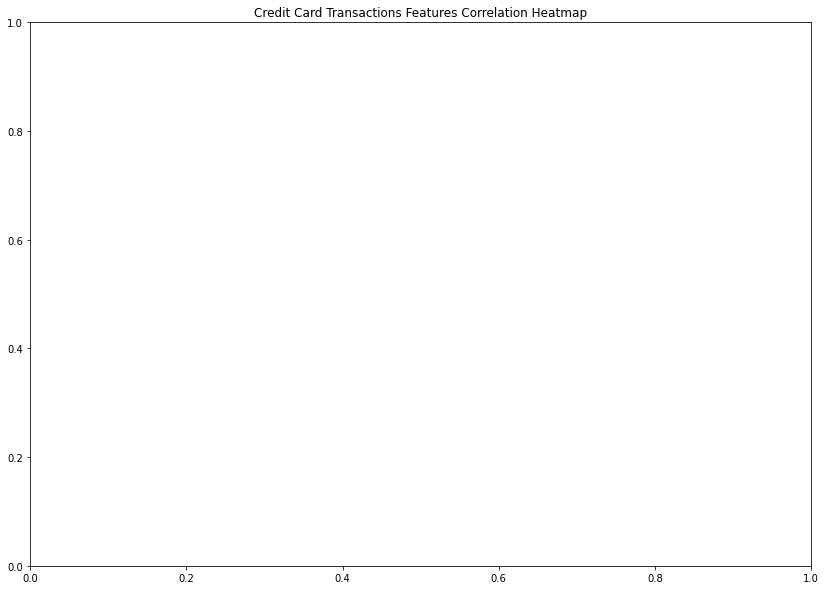

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (14,10))
plt.title('Credit Card Transactions Features Correlation Heatmap')
corr = credit.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.2,cmap="Greens")
plt.show()

# 2.5. Feature Distribution Exploration
The dataset is highly class-imbalanced, as fraudulent transactions are not common, making the predictions 

# 3. Data Balancing

In [ ]:
import pandas as pd
import numpy as np

X_pre = credit.iloc[:,0:30]  #independent columns
y_pre = credit.iloc[:,-1]    #target column 

from collections import Counter
# #Oversampling
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X, y = sm.fit_sample(X_pre, y_pre)

# #Undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X, y = rus.fit_sample(X_pre, y_pre)
# len(X)

# Combination of SMOTE Oversampling and Random undersampling
# from imblearn.combine import SMOTEENN
# smote_enn = SMOTEENN(random_state=0)
# X, y = smote_enn.fit_resample(X_pre, y_pre)
print(len(X))

984


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# 4. Feature Selection

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def model_selection(new_X_train,y_train,new_x_test,y_test,num):
    if num==1:
        mylr = LogisticRegression()
        mylr.fit(new_X_train, y_train)
        y_predict = mylr.predict(new_x_test)
        val_acc = recall_score(y_test, y_predict)
    if num==2:
        clf1 = tree.DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.03)
        clf1.fit(new_X_train, y_train)
        y_predict = clf1.predict(new_x_test)
        val_acc = recall_score(y_test, y_predict)
    if num==3:
        forest = RandomForestClassifier(max_depth=2, min_samples_split=4)
        rf = forest.fit(new_X_train, y_train)
        y_predict = rf.predict(new_x_test)
        val_acc = recall_score(y_test,y_predict)
    if num==4:
        svc = SVC(C=1, kernel='rbf', gamma=0.005)
        mysvm = svc.fit(new_X_train, y_train)
        y_predict = mysvm.predict(new_x_test)
        val_acc = recall_score(y_test,y_predict)
    return val_acc


#backward elimination
def my_feature_selector_backward(X_train,y_train,x_test,y_test,num):
    if num ==1:
        print('logistics regression')
    if num ==2:
        print('Decision Tree')
    if num ==3:
        print('Random Forest')
    print('=============== Begining backward selection ============')
    selected_vars=list(data.columns)
    selected_vars.remove('Class')
    print(len(selected_vars))
    best_acc=0
    a=1
    while(len(selected_vars)>1):
        
        candidate= None
        improve =0
        print('Trying {} var models'.format(a))
        for i in range(len(selected_vars)):
            current_var=selected_vars.copy()
            #print(current_var)
            removed=current_var.pop(i)
            if(len(selected_vars)==2):
                new_X_train = X_train[current_var].values.reshape(-1, 1)
                new_x_test = x_test[current_var].values.reshape(-1, 1)
            else:
                new_X_train = X_train[current_var]                
                new_x_test = x_test[current_var]
            val_acc= model_selection(new_X_train,y_train,new_x_test,y_test,num)
            if  val_acc - best_acc > improve:
                candidate=removed
                print(candidate)
                improve = val_acc - best_acc
                best_acc = val_acc
        if candidate is not None:
            print(candidate)
            selected_vars.remove(candidate)
            print('-------  {} is deleted ---------'.format(candidate))
        else:
            break
        print('There are {} left'.format(len(selected_vars)))
        print('The improved recall is {}'.format(improve))
        print('Best recall is {}'.format(np.round(best_acc, 9)))
        a=a+1
    print('end')
    print('Best recall is {}'.format(np.round(best_acc, 9)))
    print(selected_vars)
    return selected_vars,best_acc

def my_feature_selector_forward(X_train,y_train,x_test,y_test,num):
    if num ==1:
        print('logistics regression')
    if num ==2:
        print('Decision Tree')
    if num ==3:
        print('Random Forest')
    if num==4:
        print('SVM')
    print('=============== Begining forward selection ============')
    selected_vars=[]
    cols=list(X_train.columns)
    print(len(selected_vars))
    best_acc=0
    a=1
    while(len(cols)>0):
        candidate= None
        improve =0
        print('Trying {} var models'.format(a))
        for i in range(len(cols)):
            current_var=selected_vars.copy()
            #print(current_var)
            current_var.append(cols[i])
            if(len(current_var)==1):
                new_X_train = X_train[current_var].values.reshape(-1, 1)
                new_x_test = x_test[current_var].values.reshape(-1, 1)
            else:
                new_X_train = X_train[current_var]                
                new_x_test = x_test[current_var]
                
            val_acc= model_selection(new_X_train,y_train,new_x_test,y_test,num)
            
            if  val_acc - best_acc > improve:
                print(candidate)
                candidate=cols[i]
                improve = val_acc - best_acc
                best_acc = val_acc
        if candidate is not None:
            print(candidate)
            selected_vars.append(candidate)
            cols.remove(candidate)
            print('-------  adding {} to model ---------'.format(candidate))
        else:
            break
        print('There are {} left'.format(len(cols)))
        print('The improved recall is {}'.format(improve))
        print('Best recall is {}'.format(np.round(best_acc, 9)))
        a=a+1
    print('end')
    print('Best recall is {}'.format(np.round(best_acc, 9)))
    print(selected_vars)
    return selected_vars,best_acc

#logistics
Logistics_vars_forward, Logf_acc = my_feature_selector_forward(X_train,y_train,X_val,y_val,1)
DecisionTree_vars_forward, Decf_acc = my_feature_selector_forward(X_train,y_train,X_val,y_val,2)
RandomoForest_vars_forward, Ramf_acc = my_feature_selector_forward(X_train,y_train,X_val,y_val,3)
SVM_vars_forward, SVMf_acc=my_feature_selector_forward(X_train,y_train,X_val,y_val,4)

Logistics_vars_back,Logb_acc = my_feature_selector_backward(X_train,y_train,X_val,y_val,1)
DecisionTree_vars_back,Decb_acc = my_feature_selector_backward(X_train,y_train,X_val,y_val,2)
RandomoForest_vars_back,Ranb_acc = my_feature_selector_backward(X_train,y_train,X_val,y_val,3)
SVM_vars_backward, SVMb_acc=my_feature_selector_forward(X_train,y_train,X_val,y_val,4)

# 5. Training & Validation Dataset Prep

In [ ]:
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

class ModelSummary:
    
    def __init__(self, clf, X, y):
        self.clf = clf
        self.X = X
        self.y = y
        pass
    
    def get_se(self):
        # from here https://stats.stackexchange.com/questions/89484/how-to-compute-the-standard-errors-of-a-logistic-regressions-coefficients
        predProbs = self.clf.predict_proba(self.X)
        X_design = np.hstack([np.ones((self.X.shape[0], 1)), self.X])
        V = np.diagflat(np.product(predProbs, axis=1))
        covLogit = np.linalg.inv(np.dot(np.dot(X_design.T, V), X_design))
        return np.sqrt(np.diag(covLogit))

    def get_ci(self, SE_est):
        p = 0.975
        df = len(self.X) - 2
        crit_t_value = stats.t.ppf(p, df)
        coefs = np.concatenate([self.clf.intercept_, self.clf.coef_[0]])
        upper = coefs + (crit_t_value * SE_est)
        lower = coefs - (crit_t_value * SE_est)
        cis = np.zeros((len(coefs), 2))
        cis[:,0] = lower
        cis[:,1] = upper
        return cis

    def get_pvals(self):
        # from here https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance
        p = self.clf.predict_proba(self.X)
        n = len(p)
        m = len(self.clf.coef_[0]) + 1
        coefs = np.concatenate([self.clf.intercept_, self.clf.coef_[0]])
        se = self.get_se()
        t =  coefs/se  
        p = (1 - stats.norm.cdf(abs(t))) * 2
        return p
    
    def get_summary(self, names=None):
        ses = self.get_se()
        cis = self.get_ci(ses)
        lower = cis[:, 0]
        upper = cis[:, 1]
        pvals = self.get_pvals()
        coefs = np.concatenate([self.clf.intercept_, self.clf.coef_[0]])
        data = []
        for i in range(len(coefs)):
            currlist = []
            currlist.append(np.round(coefs[i], 3))
            currlist.append(np.round(ses[i], 3))
            currlist.append(np.round(pvals[i], 3))

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_other = train_test_split(X, test_size=0.2, random_state=0)
X_val, X_test = train_test_split(X_other, test_size=0.5, random_state=0)
y_train, y_other = train_test_split(y, test_size=0.2, random_state=0)
y_val, y_test = train_test_split(y_other, test_size=0.5, random_state=0)

# 6. Model Building
Model 1: Linear Regression

Model 2: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
mylr = logreg()
mylr.fit(X_train, y_train)
y_predict = mylr.predict(X_val)
acc = accuracy_score(y_val, y_predict)
prec = precision_score(y_val, y_predict)
rec = recall_score(y_val, y_predict)
print('Precision:{}'.format(prec))
print('Recall: {}'.format(rec))
print('Accuracy: {}'.format(acc))

Precision:1.0
Recall: 0.8833333333333333
Accuracy: 0.9285714285714286


Model 3: Decision Tree

In [ ]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.03)
clf1.fit(X_train,y_train)
y_predict = clf1.predict(X_val)
acc = accuracy_score(y_val, y_predict)
prec = precision_score(y_val, y_predict)
rec = recall_score(y_val, y_predict)
print('Precision:{}'.format(prec))
print('Recall: {}'.format(rec))
print('Accuracy: {}'.format(acc))


Model 4: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=2, min_samples_split=4)
rf = forest.fit(X_train, y_train)
y_predict = rf.predict(X_val)
acc = accuracy_score(y_val, y_predict)
prec = precision_score(y_val, y_predict)
rec = recall_score(y_val, y_predict)
print('Precision:{}'.format(prec))
print('Recall: {}'.format(rec))
print('Accuracy: {}'.format(acc))

Model 5: SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=1, kernel='rbf', gamma=0.005)
mysvm = svc.fit(X_train, y_train)
y_predict = mysvm.predict(X_val)
acc = accuracy_score(y_val, y_predict)
prec = precision_score(y_val, y_predict)
rec = recall_score(y_val, y_predict)
print('Precision:{}'.format(prec))
print('Recall: {}'.format(rec))
print('Accuracy: {}'.format(acc))

7. Evaluation

In [ ]:
y_pre = mylr.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [ ]:
y_train_pre = mylr.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [ ]:
# example of a precision-recall curve for a predictive model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

# fit a model
model = mylr
model.fit(X_train, y_train)
# predict probabilities
yhat = model.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(testy, pos_probs)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Calculate count of each class
total = len(y_test)
## 60
class_1_count = np.sum(y_test)
## 31
class_0_count = total - class_1_count
## 29
plt.figure(figsize = (20, 12))

#RANDOM MODEL
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')

#PERFECT MODEL
plt.plot([0, class_1_count, total], 
         [0, class_1_count, class_1_count], 
         c = 'grey', 
         linewidth = 2, 
         label = 'Perfect Model')

#OUR MODEL
probs = mylr6.predict_proba(X_test)
probs = probs[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot(x_values, 
         y_values, 
         c = 'b', 
         label = 'Logistic Regression', 
         linewidth = 4)

# Plot information
plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('Class 1 observations', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
from sklearn.metrics import roc_curve, auc

# Area under Random Model
a = auc([0, total], [0, class_1_count])

# Area between Perfect and Random Model
aP = auc([0, class_1_count, total], [0, class_1_count, class_1_count]) - a

# Area between Trained and Random Model
aR = auc(x_values, y_values) - a

print("Accuracy Rate for Support Vector Classifier: {}".format(aR / aP))




In [ ]:
lr = LogisticRegression(C = 10, penalty = 'l2')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_undersample_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test_undersample,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")